# Libraries & Functions

In [1]:
'''Math & Data Libraries'''
import numpy as np
import pandas as pd

In [23]:
'''Visualization Libraries'''
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid", {"grid.color": "0.5", "axes.edgecolor": "0.2"})
color_palette = ["#FF8853", "#FFE174", "#007597", "#C1C36D", "#00A697", "#BC97E0", "#ffc0bf"] #[ "#007597", "#FF8853", "#C1C36D", "#FFE174","#00A697", "#BC97E0", "#ffc0bf"]
sns.set_palette(sns.color_palette(color_palette))

In [3]:
trait_values_dict = {}

trait_values_dict["1.2.1"] = ["herb", "shrub", "tree"]
trait_values_dict["1.3.1"] = ["obligatory", "terrestrial"]
trait_values_dict["1.4.1"] = ["obligatory", "self-supporting"]
trait_values_dict["2.1.1"] = ["annual", "perennial"]
trait_values_dict["2.3.1"] = ["phanerophyte", "chamaephyte", "hemicryptophyte", "cryptophyte", "therophyte"]

In [4]:
focus_names = ["Growth Form", "Epiphyte", "Climber", "Lifecycle", "Life Form"]
focus_codes = ["1.2.1", "1.3.1", "1.4.1", "2.1.1", "2.3.1"]
df_names = ["POWO", "WIKI", "POWO_MGH"]

In [5]:
def show_values_on_bars(axs, size=14):
    def _show_on_single_plot(ax, size=size):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = max(p.get_y() + p.get_height() - 0.15, 0.1)
            value = '{:.2f}'.format(p.get_height())
            # print(_y, p.get_facecolor())
            blue_col = p.get_facecolor()[2]
            green_col = p.get_facecolor()[1]
#             if(p.get_height()<0.2):
#                 continue
            if(green_col>0.5):# or green_col<0.4):
                ax.text(_x, _y, value, ha="center", size=size) 
            else:
                ax.text(_x, _y, value, ha="center", size=size, color="white")
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Result Data

In [6]:
results_dict = {}

## Regex

In [9]:
df_results_regex1 = pd.read_excel("..//Data//Results//Regex_Simple_Results.xlsx") 
df_results_regex2 = pd.read_excel("..//Data//Results//Regex_Advanced_Results.xlsx") # Only the advanced regex is used

## Logistic Regression

In [10]:
df_results_lr = pd.read_excel("..//Data//Results//LR_Bow_Results.xlsx")

## DistilBERT

In [14]:
df_results_DistilBERT = pd.read_excel("..//Data//Results//DistilBERT_Results.xlsx")

## SciBERT

In [13]:
df_results_SciBERT = pd.read_excel("..//Data//Results//SciBERT_Results.xlsx")

## Group Results

In [15]:
df_results_full = pd.concat([df_results_regex2, df_results_lr, df_results_DistilBERT, df_results_SciBERT])

In [17]:
# Calculate per average per database per model
average_rows = []
for dataset in ["POWO", "WIKI"]:
    for model in ["Regex", "Logistic Regression", "DistilBERT_PreTrained", "SciBERT_PreTrained"]:
        metric_averages = []
        for metric in ["Accuracy", "Precision", "Recall", "F1-Score"]:
            avg = 0
            for trait in ["Growth Form", "Epiphyte", "Climber", "Lifecycle", "Life Form"]:
                df_subset = df_results_full[(df_results_full["Train Dataset"]==dataset)*
                                            (df_results_full["Test Dataset"]==dataset)*
                                            (df_results_full["Model"]==model)*
                                            (df_results_full["Trait Value"]==trait)]
                avg += df_subset[metric].values[0]/5
            metric_averages.append(avg)
        average_rows.append([dataset, dataset, "Average", "Average"] + metric_averages + [model, model])

In [18]:
df_results_full = pd.concat([df_results_full, pd.DataFrame(average_rows, columns = df_results_full.columns)])

In [19]:
df_results_full

,Train Dataset,Test Dataset,Trait,Trait Value,Accuracy,Precision,Recall,F1-Score,Model,Representation
0,POWO,POWO,Growth Form,herb,0.727383,0.945547,0.572706,0.713347,Regex,Regex
1,POWO,POWO,Growth Form,shrub,0.864647,0.588392,0.765926,0.665522,Regex,Regex
2,POWO,POWO,Growth Form,tree,0.931412,0.938053,0.754025,0.836032,Regex,Regex
3,POWO,POWO,Growth Form,Growth Form,0.841147,0.823997,0.697552,0.738300,Regex,Regex
4,WIKI,WIKI,Growth Form,herb,0.678115,0.950318,0.366645,0.529141,Regex,Regex
...,...,...,...,...,...,...,...,...,...,...
3,POWO,POWO,Average,Average,0.943424,0.908036,0.888371,0.897341,SciBERT_PreTrained,SciBERT_PreTrained
4,WIKI,WIKI,Average,Average,0.645486,0.782594,0.247051,0.309445,Regex,Regex
5,WIKI,WIKI,Average,Average,0.904644,0.830781,0.779760,0.798762,Logistic Regression,Logistic Regression
6,WIKI,WIKI,Average,Average,0.948506,0.910076,0.886910,0.897131,DistilBERT_PreTrained,DistilBERT_PreTrained


# Model Comparison

C:\Users\Admin\AppData\Local\Temp\ipykernel_33628\2412671535.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
C:\Users\Admin\AppData\Local\Temp\ipykernel_33628\2412671535.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)


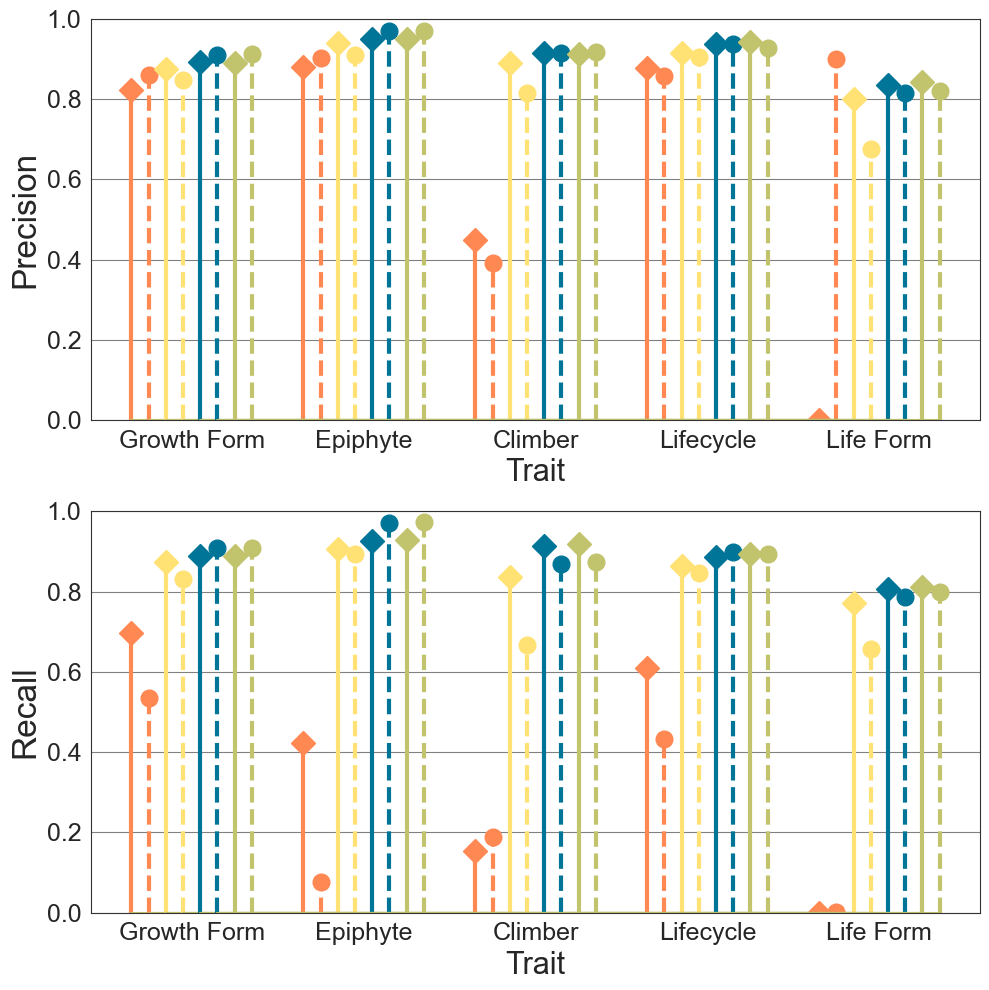

In [25]:
fig, axes  = plt.subplots(figsize=(10,10), nrows = 2)
for i, metric in enumerate(["Precision", "Recall"]):
    plt.subplot(2, 1, i+1)
    start = 0
    for j, model in enumerate(["Regex", "Logistic Regression", "DistilBERT_PreTrained", "SciBERT_PreTrained"]):
        for k, dataset in enumerate(["POWO", "WIKI"]):
            df_subset = df_results_full[(df_results_full["Model"]==model)*(df_results_full["Train Dataset"]==dataset)*(df_results_full["Test Dataset"]==dataset)*df_results_full["Trait Value"].apply(lambda x: x in focus_names)]
            if(dataset=="POWO"):
                (markers, stemlines, baseline) = plt.stem(start + np.arange(len(df_subset))*10, df_subset[metric])
                plt.setp(markers, marker='D', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, color = color_palette[j])
                
            if(dataset=="WIKI"):
                (markers, stemlines, baseline) = plt.stem(start + 1 + np.arange(len(df_subset))*10, df_subset[metric])
                plt.setp(markers, marker='o', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, linestyle = "--", color = color_palette[j])
                start += 2
    
    axes[i].set_xticks(np.arange(3.5, 50, 10))
    axes[i].set_xticklabels(["Growth Form", "Epiphyte", "Climber", "Lifecycle", "Life Form"], size=18, rotation="horizontal")
    axes[i].set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
    axes[i].grid(axis='x')
    plt.xlabel("Trait", size = 22)
    plt.ylabel(metric, size = 24)
    plt.ylim(0, 1)
    plt.tight_layout()

C:\Users\Admin\AppData\Local\Temp\ipykernel_33628\27031239.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
C:\Users\Admin\AppData\Local\Temp\ipykernel_33628\27031239.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)


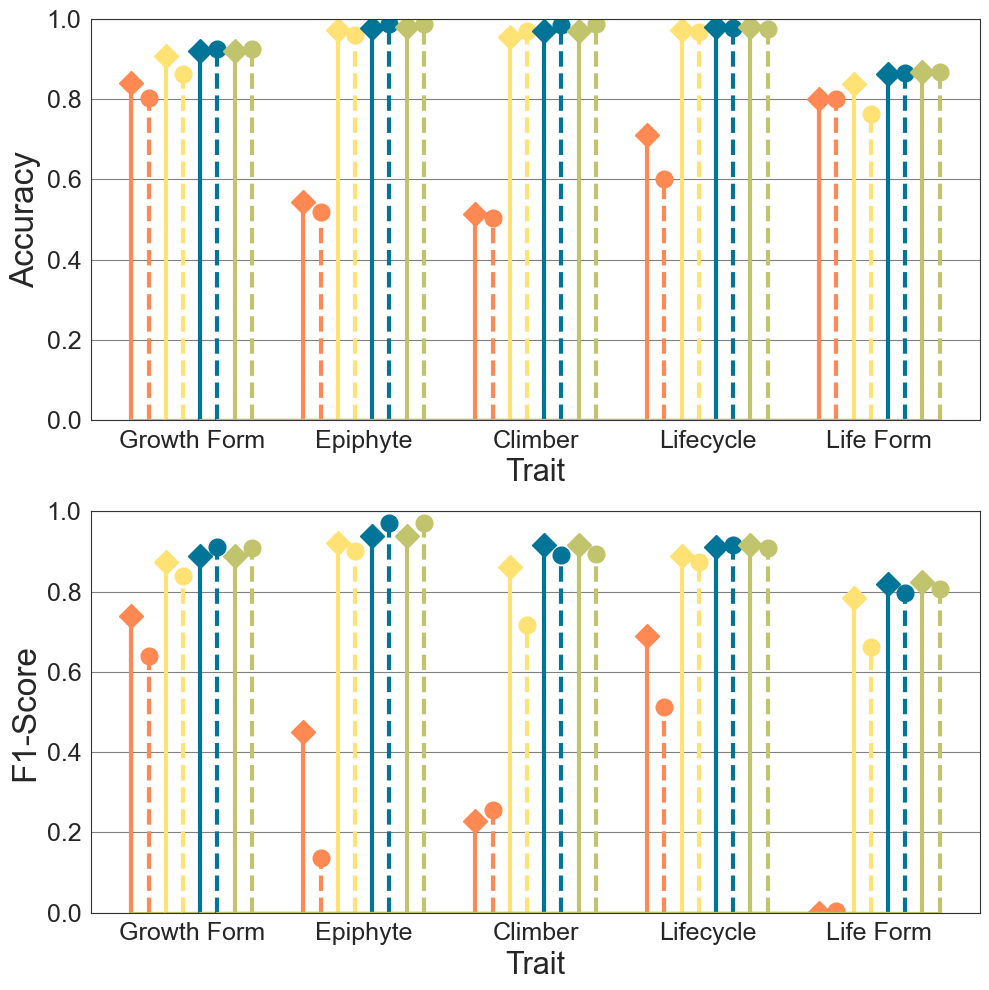

In [26]:
fig, axes  = plt.subplots(figsize=(10,10), nrows = 2)
for i, metric in enumerate(["Accuracy", "F1-Score"]):
    plt.subplot(2, 1, i+1)
    start = 0
    for j, model in enumerate(["Regex", "Logistic Regression", "DistilBERT_PreTrained", "SciBERT_PreTrained"]):
        for k, dataset in enumerate(["POWO", "WIKI"]):
            df_subset = df_results_full[(df_results_full["Model"]==model)*(df_results_full["Train Dataset"]==dataset)*(df_results_full["Test Dataset"]==dataset)*df_results_full["Trait Value"].apply(lambda x: x in focus_names)]
            if(dataset=="POWO"):
                (markers, stemlines, baseline) = plt.stem(start + np.arange(len(df_subset))*10, df_subset[metric])
                plt.setp(markers, marker='D', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, color = color_palette[j])
                
            if(dataset=="WIKI"):
                (markers, stemlines, baseline) = plt.stem(start + 1 + np.arange(len(df_subset))*10, df_subset[metric])
                plt.setp(markers, marker='o', markersize=12, color = color_palette[j])
                plt.setp(stemlines, linewidth=3, linestyle = "--", color = color_palette[j])
                start += 2
    
    axes[i].set_xticks(np.arange(3.5, 50, 10))
    axes[i].set_xticklabels(["Growth Form", "Epiphyte", "Climber", "Lifecycle", "Life Form"], size=18, rotation="horizontal")
    axes[i].set_yticklabels(np.round(np.arange(0, 1.2, 0.2), 1), size=18)
    axes[i].grid(axis='x')
    plt.xlabel("Trait", size = 22)
    plt.ylabel(metric, size = 24)
    plt.ylim(0, 1)
    plt.tight_layout()

# Cross Dataset Evaluation

In [29]:
import cmasher as cmr
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl

def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))# + [100]


def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

test_color_rgb = hex_to_rgb(color_palette[3])

N = 256
test_color_map = np.ones((N, 4))
top = 1
test_color_map[:, 0] = np.linspace(top, test_color_rgb[0]/256, N) # R = 255
test_color_map[:, 1] = np.linspace(top, test_color_rgb[1]/256, N) # G = 232
test_color_map[:, 2] = np.linspace(top, test_color_rgb[2]/256, N)  # B = 11
test_color_map[:, 3] = np.linspace(0.3, 0.9, N)  # B = 11

test_color_map_cmp = ListedColormap(test_color_map)

In [30]:
def create_sequential_colormap(color):
    color_rgb = hex_to_rgb(color)
    N = 256
    color_map = np.ones((N, 4))
    top = 1
    color_map[:, 0] = color_rgb[0]/256
    color_map[:, 1] = color_rgb[1]/256
    color_map[:, 2] = color_rgb[2]/256
    color_map[:, 3] = np.linspace(0.3, 1, N)
    
    return  ListedColormap(color_map)

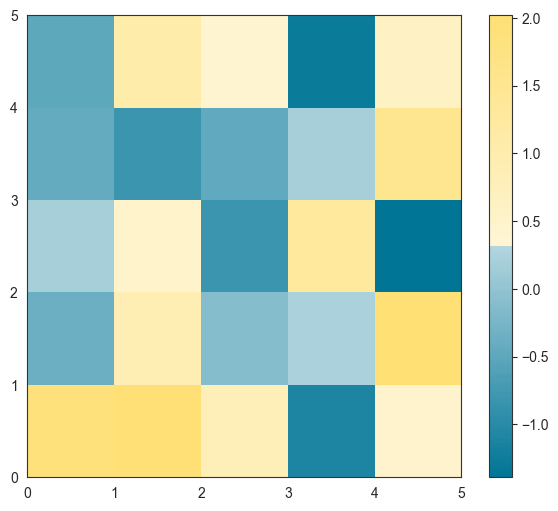

In [32]:
cmap_part1 = create_sequential_colormap(color_palette[2])
cmap_part2 = create_sequential_colormap(color_palette[1])

newcolors2 = np.vstack((cmap_part1(np.linspace(1, 0, 128)),
                       cmap_part2(np.linspace(0, 1, 128))))
double = ListedColormap(newcolors2, name='double')
plt.figure(figsize=(7, 6))
plt.pcolormesh(np.random.normal(0,1,(5,5)), cmap=double)
plt.colorbar()

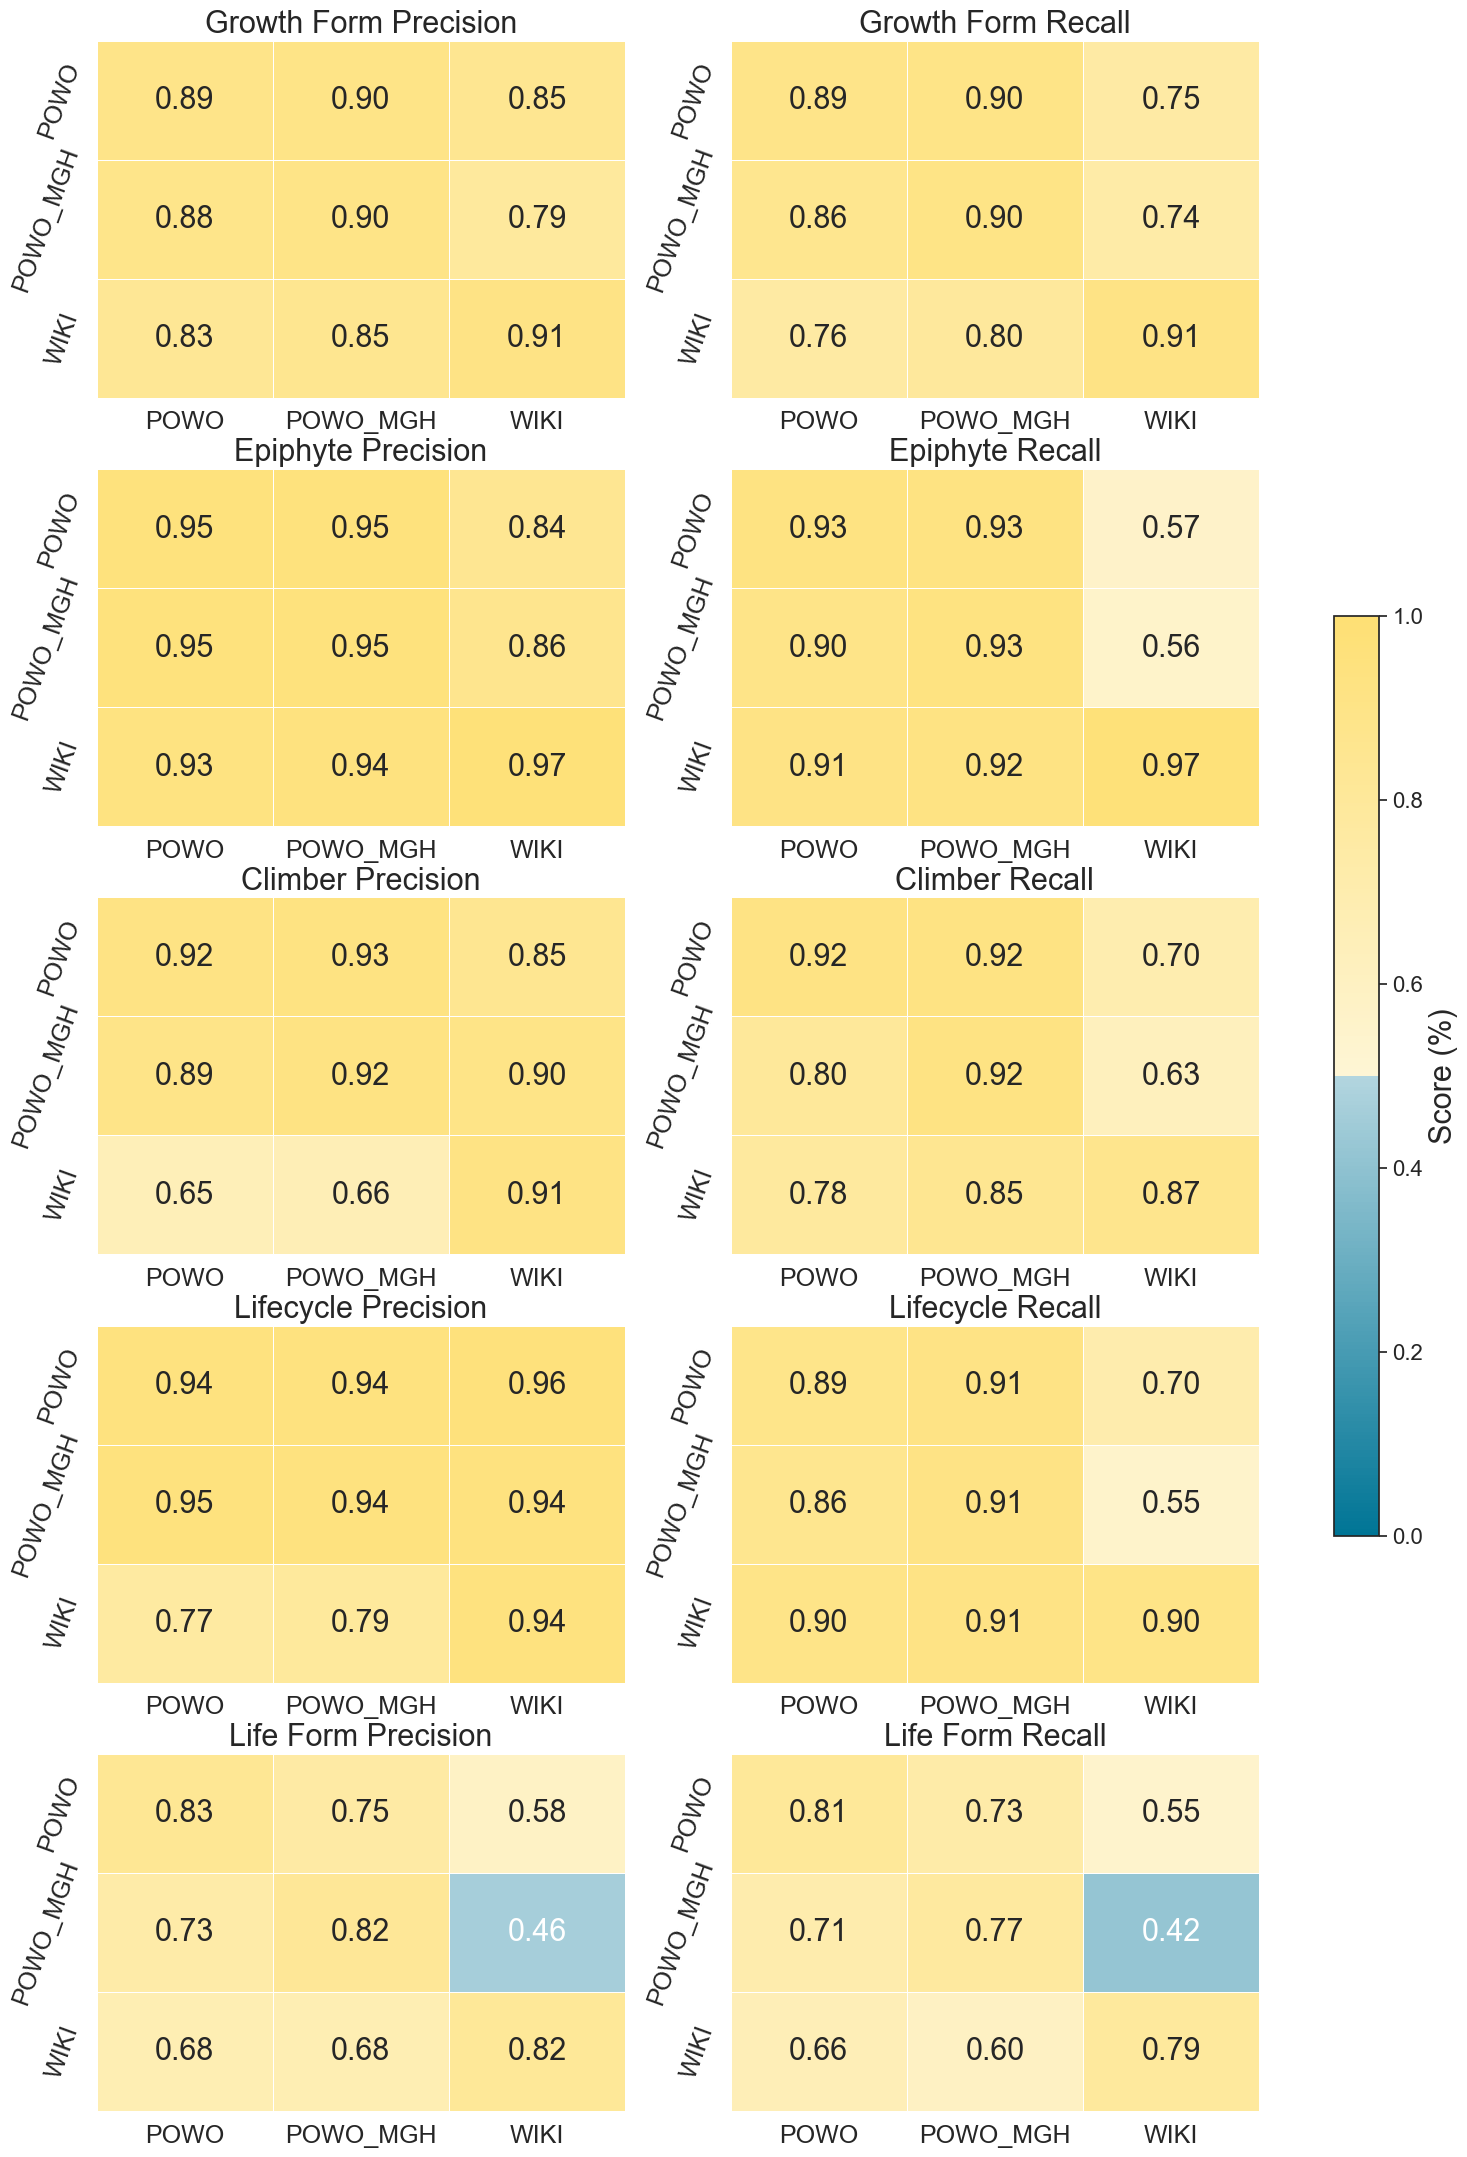

In [39]:
df_subset = df_results_full[(df_results_full["Model"]=="DistilBERT_PreTrained")*df_results_full["Trait Value"].apply(lambda x: x in focus_names)]
sns.set_theme(style="white", palette=None)

cmap = cmr.ember #cmr.amber
# cmap = cmr.amber

c = 0.25
n = 100
cmap = ListedColormap((1. - c) * cmap(np.linspace(0., 1., n)) + c * np.ones((n, 4)))
# cmap = test_color_map_cmp
cmap = "viridis"
cmap = double#matplotlib.colors.LinearSegmentedColormap.from_list("", color_palette[2:3] + color_palette[1:2])

plt.subplots(figsize=(15,23), nrows = 5, ncols = 2)
metric1 = "Precision"
metric2 = "Recall"
# plt.suptitle("Interdataset Evaluation - DistilBERT", fontsize = 30)
for i, focus_name in enumerate(focus_names[:]):
    plt.subplot(5, 2, 2*i+1)
    df_matrix = df_subset[(df_subset["Trait"]==focus_name)][["Train Dataset", "Test Dataset", metric1]].set_index(["Train Dataset", "Test Dataset"]).unstack(fill_value=0)
    im1 = sns.heatmap(df_matrix, vmin=0, vmax = 1, annot = True, fmt = '.2f', annot_kws = {"fontsize":22}, cmap=cmap, cbar=False, linewidths=.5)
    plt.xticks(np.arange(3)+0.5, ["POWO", "POWO_MGH", "WIKI"], rotation=0, size=18)
    plt.yticks(np.arange(3)+0.5, ["POWO", "POWO_MGH", "WIKI"], rotation=70, size=18)
    plt.title(focus_name + " " + metric1, fontsize = 22)
    plt.xlabel("", fontsize = 16)
    plt.ylabel("", fontsize = 16)

    plt.subplot(5, 2, 2*i+2)
    df_matrix = df_subset[(df_subset["Trait"]==focus_name)][["Train Dataset", "Test Dataset", metric2]].set_index(["Train Dataset", "Test Dataset"]).unstack(fill_value=0)
    im1 = sns.heatmap(df_matrix, vmin=0, vmax = 1, annot = True, fmt = '.2f', annot_kws = {"fontsize":22}, cmap=cmap, cbar=False, linewidths=.5)
    plt.xticks(np.arange(3)+0.5, ["POWO", "POWO_MGH", "WIKI"], rotation=0, size=18)
    plt.yticks(np.arange(3)+0.5, ["POWO", "POWO_MGH", "WIKI"], rotation=70, size=18)
    plt.title(focus_name + " " + metric2, fontsize = 22)
    plt.xlabel("", fontsize = 16)
    plt.ylabel("", fontsize = 16)
    
plt.subplots_adjust(bottom=0.05, right=0.90, top=0.95)
cax = plt.axes([0.95, 0.3, 0.03, 0.4])

sm = plt.cm.ScalarMappable(cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))
sm.set_array([])

cbar = plt.colorbar(sm, cax=cax)
cbar.ax.tick_params(labelsize=16)
cbar.set_label("Score (%)", size=22)
# plt.show()
# plt.savefig("Figures/InterDatasetResults_v2.png", dpi=600, bbox_inches='tight')